Just starting to think about how I can do this. 

# Collecting Stats From Previously Gathered Data

### Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [33]:
def returnFullSeasonStats(teamName):
    """
    Goes into stats folder and reads in the both stats and Info csv files
    Concats them into a single data frame and returns them.

    Args:
        teamName (string): the team name matching the name within Stats File
        
    Returns:
        TeamPDStats: Pandas Data-Frame of team game stats from all seasons collected
        teamPDInfo: Pandas Data-Frame of game info from all seasons collected
    """
    #data frame holding things like total yards for every season collected
    teamPDStats = pd.DataFrame()
    #data frame holding things like weather for every game in every season collected
    teamPDInfo = pd.DataFrame()
    #gets all csv files for a team
    dirList = os.listdir(f"Stats/{teamName}/")
    for file in dirList:
        #if stats then --> else, it is the game info. 
        if "Stats" in file:
            curr = pd.read_csv(f"Stats/{teamName}/{file}")
            teamPDStats = pd.concat([teamPDStats, curr],axis = 0)
        else:
            curr = pd.read_csv(f"Stats/{teamName}/{file}")
            teamPDInfo = pd.concat([teamPDInfo, curr],axis = 0)
    #returns the collected, concected pds. 
    return teamPDStats, teamPDInfo
 
def returnSpecificRow(temaDataFrame, statName):
    statPD = pd.DataFrame(temaDataFrame.loc[temaDataFrame["Unnamed: 1"] == statName, "Game0": "Game16"].values.flatten())
    return statPD


In [ ]:
#directory where Stats was stored
directory = 'Stats/'

yearArr = [2018, 2019, 2020, 2021, 2022, 2023]

#array of each directory within stats
TeamNamesArr= os.listdir(directory)

for team in TeamNamesArr:
    if team == ".DS_Store":
        continue
    currFullSeasonStats, currFullSeasonInfo = returnFullSeasonStats(team)

    #geting team scores and opp scores
    teamsScore = returnSpecificRow(currFullSeasonStats, "DEN Score")
    opponentScore = returnSpecificRow(currFullSeasonStats, "Opp Score")

    #getting total score
    totalScore = teamsScore[0].astype(float) + opponentScore[0].astype(float)

    #getting actual spread
    realSpread = teamsScore[0].astype(float) - opponentScore[0].astype(float)
    
    #getting vegas over under
    overUnder = returnSpecificRow(currFullSeasonInfo, "Over/Under")

    #getting vegas spread
    spread = returnSpecificRow(currFullSeasonInfo, "Vegas Line")


    '''
    This takes the pandas array, with info like "45.5 (over)" and takes just the number
    extract takes a regular exprexsion (regex) \d grabs number before decimal place
    \.? grabs the the decimal point and \d* grabs the post decimal place. 
    () tells .extract to only take what is in the parentheses until white space.
    '''
    overUnderNumber = overUnder[0].str.extract(r"(\d+\.\d*)").astype(float)
    spreadNumber = spread[0].str.extract(r"(\d+\.\d*)").astype(float)

    #convering spread to be in format as vegas. 
    for i in range(len(realSpread)):
        if ("nan" not in str(spread[0][i])) and team in spread[0][i]:
            #if broncos were favored then switch there real spread to reflect they won
            print(spreadNumber[0][i])
            spreadNumber[0][i] = -1 * spreadNumber[0][i]

    currBeatSpread = realSpread - spreadNumber
    break
    




<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xn/xm07qqqx6q93rm93tp51mjvh0000gn/T/ipykernel_12791/3857150995.py:31: SyntaxWarning: invalid escape sequence '\d'
  '''
/var/folders/xn/xm07qqqx6q93rm93tp51mjvh0000gn/T/ipykernel_12791/3857150995.py:44: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in 

## When the actual spread wins, it means the current team of interest beat the spread

Dont love current implementation, need to think further about how I want to visualize when current team of interest is the underdog vs favored. As it stands, I changed the actual game score difference (team of interest - opponent team) to be negative if they were favored. 

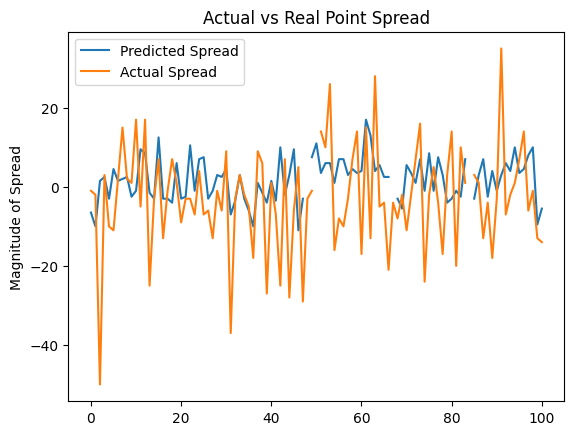

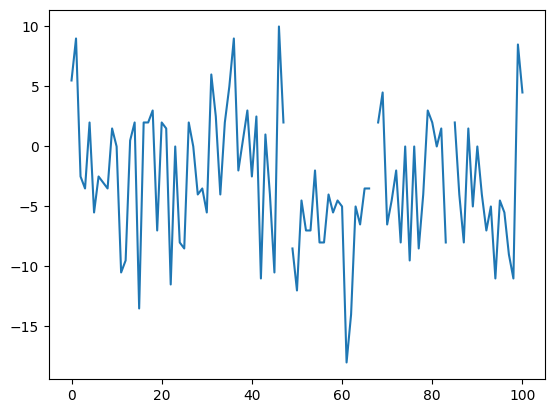

In [133]:
plt.plot(spreadNumber, label = "Predicted Spread")
plt.plot(realSpread, label = "Actual Spread")
plt.title("Actual vs Real Point Spread")
plt.ylabel("Magnitude of Spread")
plt.legend()



plt.figure(2)
plt.plot(currBeatSpread)

In [134]:
spreadNumber

,0
0,-6.5
1,-10.0
2,1.5
3,2.5
4,-3.0
...,...
97,8.0
98,10.0
99,-9.5
100,-5.5


In [23]:
currFullSeasonStats["Unnamed: 1"].head(16)

0         Cmp-Att-Yd-TD-INT
1                 DEN Score
2               First Downs
3         Fourth Down Conv.
4              Fumbles-Lost
5                  HomeTeam
6            Net Pass Yards
7                 Opp Score
8     Opp_Cmp-Att-Yd-TD-INT
9           Opp_First Downs
10    Opp_Fourth Down Conv.
11         Opp_Fumbles-Lost
12       Opp_Net Pass Yards
13      Opp_Penalties-Yards
14         Opp_Rush-Yds-TDs
15         Opp_Sacked-Yards
Name: Unnamed: 1, dtype: object

In [26]:
currFullSeasonInfo["Unnamed: 1"].head(9)

0     Attendance
1       Duration
2     Over/Under
3           Roof
4        Surface
5     Vegas Line
6        Weather
7    Won OT Toss
8       Won Toss
Name: Unnamed: 1, dtype: object

In [107]:
for i in range(65, 69):
    if ("nan" not in str(spread[0][i])):
        print(f"{spread[0][i]} is number")
    else:
        print(f"{spread[0][i]} is nan")

Los Angeles Chargers -2.5 is number
Las Vegas Raiders -2.5 is number
nan is nan
Denver Broncos -3.0 is number


0       16
1       33
2       20
3       31
4       21
      ... 
97      14
98      16
99      14
100      9
101    NaN
Name: 0, Length: 102, dtype: object

In [87]:
spread[0].str.extract(r"(\d+\.\d*)").astype(float)


,0
0,6.5
1,10.0
2,1.5
3,2.5
4,3.0
...,...
97,8.0
98,10.0
99,9.5
100,5.5
